In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

#plot styles

COLOR = 'white'
plt.style.use('dark_background')
plt.rcParams['text.color'] = COLOR
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [2]:
data = pd.read_csv('./2014-2021-PIT-esimates-cleanish.csv', low_memory=False).drop(columns=['Unnamed: 0'])


In [6]:
data.head()



,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
0,AK-500,Anchorage CoC,1023.0,188.0,146.0,689.0,665.0,86.0,88.0,491.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
1,AK-501,Alaska Balance of State CoC,761.0,209.0,56.0,496.0,474.0,119.0,30.0,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anchorage,ak
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",1329.0,262.0,76.0,991.0,387.0,47.0,27.0,313.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,birmingham,al
3,AL-501,Mobile City & County/Baldwin County CoC,598.0,126.0,44.0,428.0,287.0,69.0,24.0,194.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mobile,al
4,AL-502,Florence/Northwest Alabama CoC,209.0,50.0,6.0,153.0,38.0,7.0,1.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,florence,al


In [4]:
data.groupby(['City', 'State','year'])[['Overall Homeless']].sum()

Overall Homeless
City      State year                  
aberdeen  md    2014             223.0
                2015             210.0
                2016             179.0
                2017             189.0
                2018             190.0
...                                ...
ypsilanti mi    2016             342.0
                2017             302.0
                2018             282.0
                2019             273.0
                2020             274.0

[2566 rows x 1 columns]

In [8]:
# Overall Homeless numbers for the country in 2020 by state

PIT_state = data[data['year']==2020].groupby(['State'])[['Overall Homeless']].sum()
PIT_state = PIT_state.reset_index()
PIT_state['State'] = PIT_state['State'].str.upper()
# Number of homeless people in the US in 2020
PIT_state['Overall Homeless'].sum()
#Percentage of peeople homeless in the US in 2020
PIT_state['Overall Homeless'].sum()/331_449_281
PIT_state.sort_values(by = 'Overall Homeless', ascending = False).head(5)

,State,Overall Homeless
4,CA,161548.0
35,NY,91271.0
45,TX,27229.0
9,FL,25977.0
50,WA,22923.0


In [145]:
import plotly.express as px 
from plotly.subplots import make_subplots

fig_1 = px.choropleth(PIT_state,  # Input Pandas DataFrame
                    locations = "State",  # DataFrame column with locations
                    color = "Overall Homeless",  # DataFrame column with color values
                    hover_name = "State", # DataFrame column hover info
                    locationmode = 'USA-states',# Set to plot as US States
                    hover_data = ['Overall Homeless'], #show the homeless numbers on hover 
                    color_continuous_scale = px.colors.sequential.Blues,
                      template = 'plotly_dark'
                                            ) 

fig_1.update_layout(
    title_text = '# Homeless in the US in 2020: 574577 ', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe

)


In [143]:
# Overall Homeless numbers for the country in 2019 by state

PIT_state = data[data['year']==2019].groupby(['State'])[['Overall Homeless']].sum()
PIT_state = PIT_state.reset_index()
PIT_state['State'] = PIT_state['State'].str.upper()
# Number of homeless people in the US in 2019
PIT_state['Overall Homeless'].sum()
#Percentage of peeople homeless in the US in 2019
PIT_state['Overall Homeless'].sum()/328_239_523
PIT_state.sort_values(by = 'Overall Homeless', ascending = False).head(5)
fig_1 = px.choropleth(PIT_state,  # Input Pandas DataFrame
                    locations = "State",  # DataFrame column with locations
                    color = "Overall Homeless",  # DataFrame column with color values
                    hover_name = "State", # DataFrame column hover info
                    locationmode = 'USA-states',# Set to plot as US States
                    hover_data = ['Overall Homeless'], #show the homeless numbers on hover 
                    color_continuous_scale = px.colors.sequential.Blues,
                    template = 'plotly_dark'
                       ) 

fig_1.update_layout(
    title_text = '# Homeless in the US in 2019: 561766 ', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

## Case study of groups 1 and 2 in Andrew's kmeans clusters

- group 1: Atlanta, Houston, Madison 
- group 2: Austin, Jacksonville

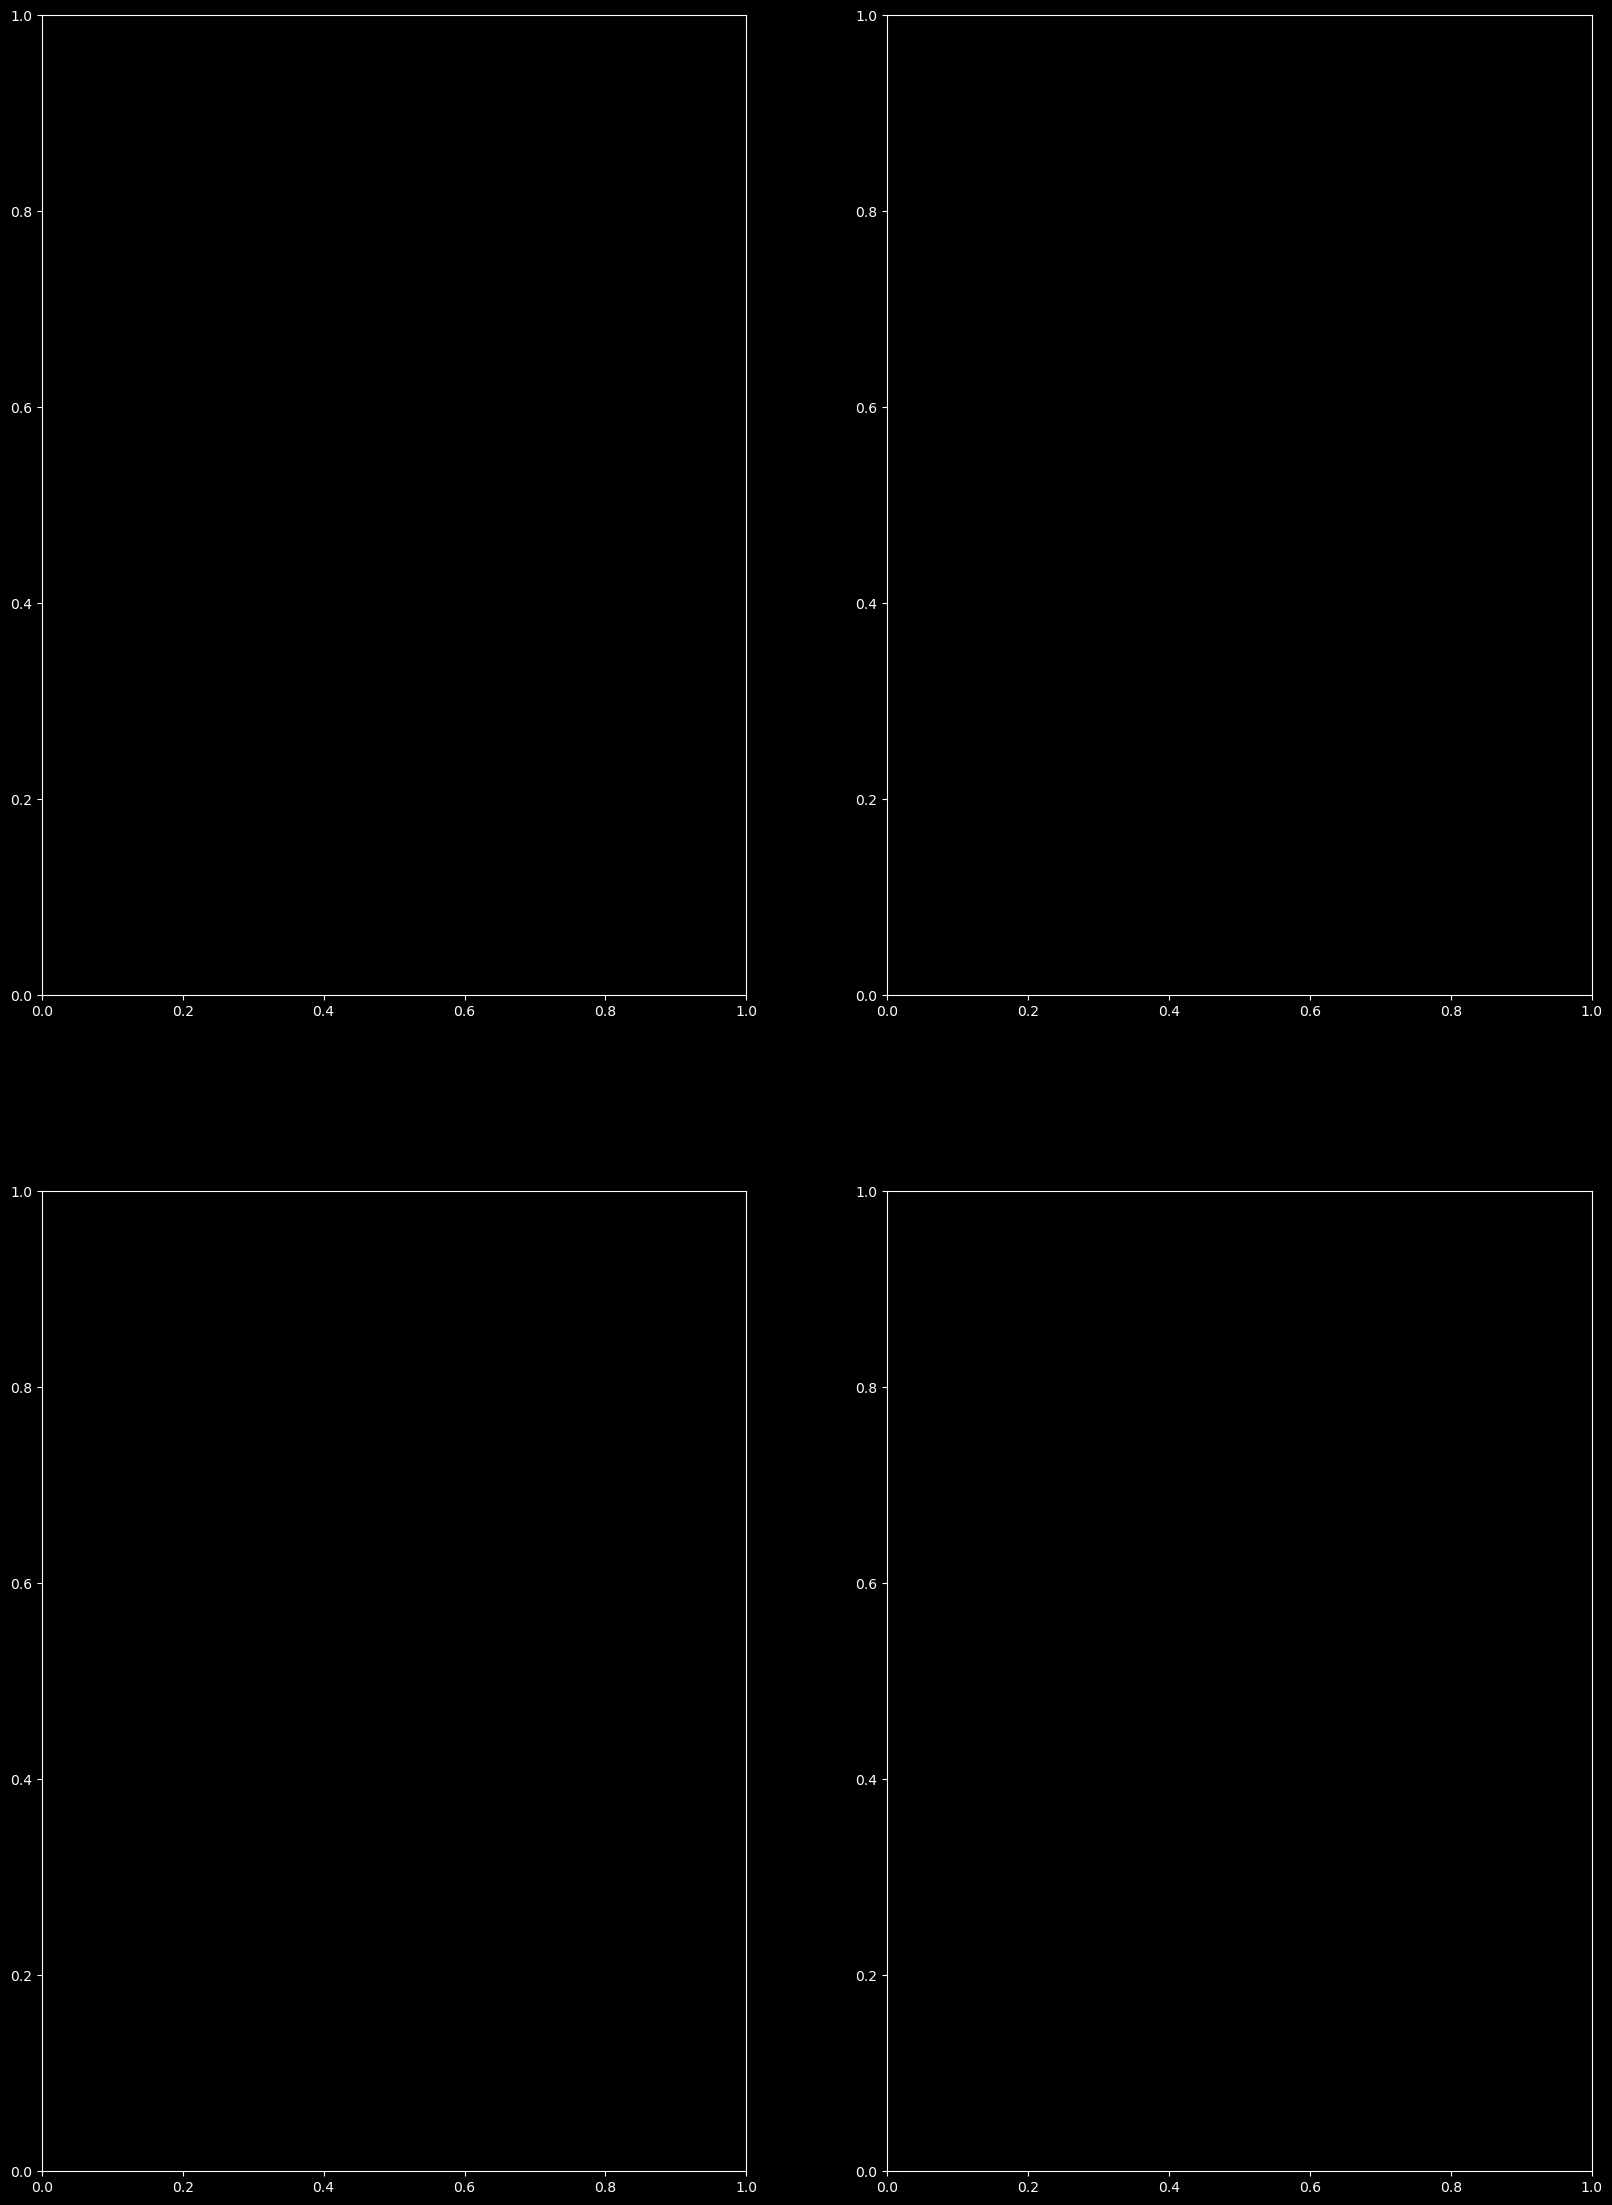

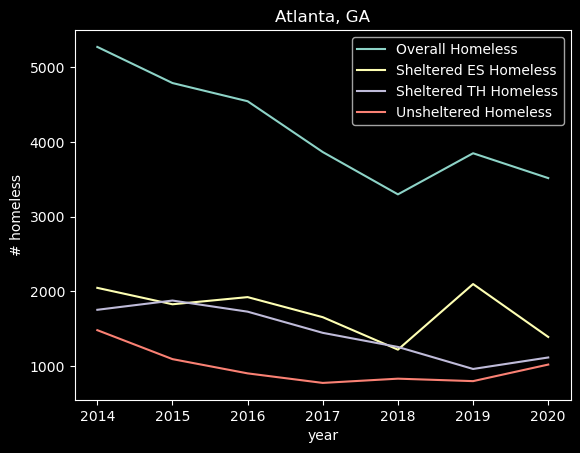

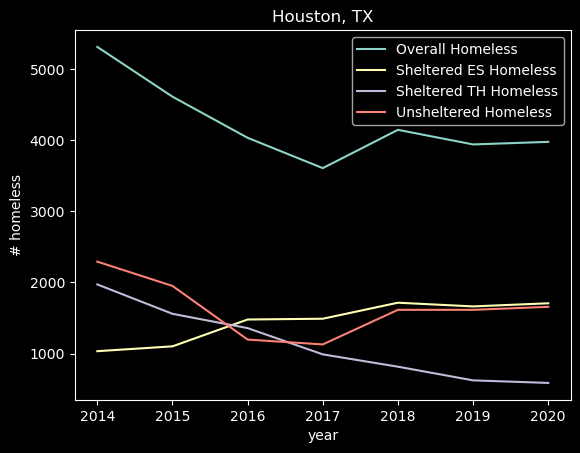

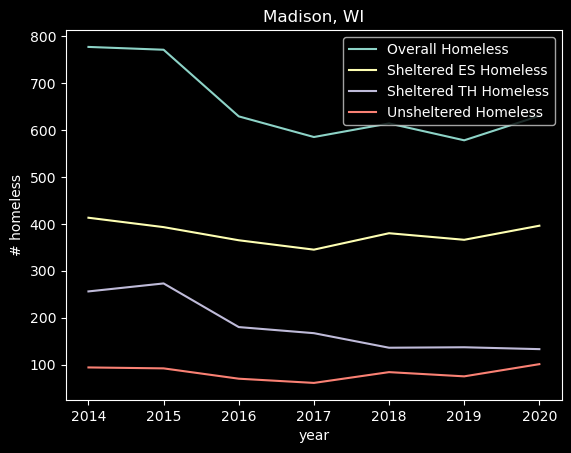

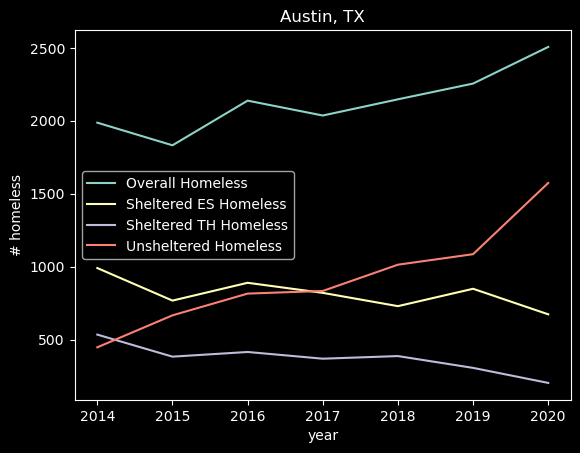

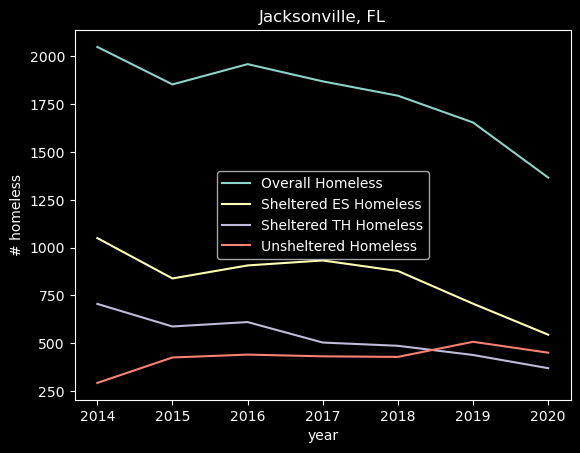

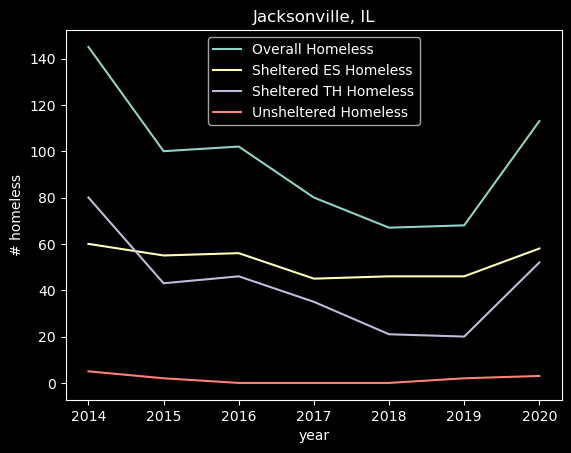

In [51]:
#change in homeless numbers between 2014 and 2020

cities = [('atlanta', 'ga'), ('houston', 'tx'), ('madison', 'wi'), ('austin', 'tx'), ('jacksonville', 'fl'), ('jacksonville', 'il')];
fig, axes = plt.subplots(len(cities),1,figsize = (8,25));
plt.close()
for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]
    axes[i] = city_data.groupby('year').sum().plot()
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylabel('# homeless')
plt.show()

## A different question:

- Which cities saw the highest increases/decreases in homeless numbers?

In [52]:

df = data.groupby(['City','State','year']).sum().reset_index()

#make a dataframe with change in homeless numbers for each city between 2014 -2021
start_year = 2014
end_year = 2020


df_start_year = df[df['year'] == start_year].drop(columns = ['year']).set_index(['City','State'])
df_end_year = df[df['year'] == end_year].drop(columns = ['year']).set_index(['City','State'])

# dropping cities for which we don't have data for both start_year and end_year

#df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless')
df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless').head(10)
df_end_year.subtract(df_start_year).dropna().sort_values(by = 'Overall Homeless').tail(10)




,,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered TH Homeless,Sheltered TH Homeless - Under 18,...,Unsheltered Homeless Parenting Youth (Under 25) - Transgender,Unsheltered Homeless Parenting Youth (Under 25) - Gender Non-Conforming,Unsheltered Homeless Parenting Youth (Under 25) - Non-Hispanic/Non-Latino,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races
City,State,,,,,,,,,,,,,,,,,,,,,
mesa,az,1501.0,-583.0,-71.0,2155.0,-386.0,-35.0,-55.0,-296.0,-848.0,-611.0,...,0.0,0.0,2.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
corvallis,or,1520.0,-21.0,-125.0,1666.0,-430.0,-52.0,-63.0,-315.0,-568.0,-282.0,...,0.0,0.0,13.0,1.0,13.0,0.0,0.0,0.0,0.0,1.0
san francisco,ca,1716.0,-110.0,-567.0,2393.0,949.0,31.0,10.0,908.0,-44.0,-56.0,...,0.0,0.0,8.0,5.0,2.0,5.0,0.0,1.0,1.0,4.0
san jose,ca,2038.0,21.0,614.0,1403.0,426.0,148.0,10.0,268.0,-646.0,-310.0,...,0.0,0.0,16.0,9.0,8.0,7.0,1.0,3.0,1.0,5.0
"renton,",wa,2802.0,411.0,368.0,2023.0,1179.0,237.0,56.0,886.0,-1258.0,-461.0,...,0.0,0.0,13.0,37.0,22.0,7.0,0.0,16.0,2.0,3.0
sacramento,ca,3062.0,226.0,233.0,2603.0,351.0,-8.0,53.0,306.0,-403.0,-104.0,...,0.0,0.0,27.0,6.0,6.0,20.0,0.0,0.0,0.0,7.0
santa ana,ca,3145.0,146.0,-60.0,3059.0,1351.0,114.0,43.0,1194.0,-489.0,-213.0,...,0.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
oakland,ca,3865.0,-323.0,289.0,3899.0,394.0,17.0,-14.0,391.0,-531.0,-257.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
brooklyn,ny,10133.0,-753.0,198.0,10688.0,11748.0,-181.0,170.0,11759.0,-2060.0,-567.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Distribution of the homeless numbers
data[data['year'] == 2020].groupby(['City','State']).sum().describe()

,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,Sheltered TH Homeless,Sheltered TH Homeless - Under 18,...,Unsheltered Homeless Parenting Youth (Under 25) - Transgender,Unsheltered Homeless Parenting Youth (Under 25) - Gender Non-Conforming,Unsheltered Homeless Parenting Youth (Under 25) - Non-Hispanic/Non-Latino,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races
count,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,...,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000,370.000000
mean,1552.910811,284.127027,120.794595,1147.989189,750.743243,202.554054,52.775676,495.413514,193.602703,53.924324,...,0.005405,0.005405,0.883784,0.602703,0.627027,0.610811,0.005405,0.102703,0.029730,0.110811
std,5386.604891,1322.763989,451.899083,3779.341668,3786.950488,1278.060662,333.105688,2183.980574,334.413237,91.650093,...,0.073422,0.103975,3.500678,6.473753,2.946924,6.566309,0.073422,0.928468,0.236695,0.603640
min,21.000000,0.000000,0.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,301.750000,51.500000,18.000000,218.250000,145.000000,29.000000,8.000000,101.000000,35.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,607.500000,107.500000,42.500000,434.000000,251.500000,59.000000,16.000000,190.000000,99.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1395.500000,197.750000,99.000000,1055.750000,614.750000,133.000000,40.000000,441.750000,213.750000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,77943.000000,23940.000000,7163.000000,52034.000000,70875.000000,23859.000000,6288.000000,40728.000000,3455.000000,850.000000,...,1.000000,2.000000,50.000000,118.000000,44.000000,124.000000,1.000000,16.000000,3.000000,7.000000


In [54]:
#which CoC has the highest homeless numbers?
data.sort_values(by = ['Overall Homeless'], ascending = False).head()

,CoC Number,CoC Name,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Sheltered ES Homeless,Sheltered ES Homeless - Under 18,Sheltered ES Homeless - Age 18 to 24,Sheltered ES Homeless - Over 24,...,Unsheltered Homeless Parenting Youth (Under 25) - Hispanic/Latino,Unsheltered Homeless Parenting Youth (Under 25) - White,Unsheltered Homeless Parenting Youth (Under 25) - Black or African American,Unsheltered Homeless Parenting Youth (Under 25) - Asian,Unsheltered Homeless Parenting Youth (Under 25) - American Indian or Alaska Native,Unsheltered Homeless Parenting Youth (Under 25) - Native Hawaiian or Other Pacific Islander,Unsheltered Homeless Parenting Youth (Under 25) - Multiple Races,CoC Category,City,State
1843,NY-600,New York City CoC,78676.0,25747.0,7571.0,45358.0,72187.0,25726.0,6921.0,39540.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
2236,NY-600,New York City CoC,78604.0,24725.0,7316.0,46563.0,72123.0,24702.0,6668.0,40753.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
2628,NY-600,New York City CoC,77943.0,23940.0,7163.0,46840.0,70875.0,23859.0,6288.0,40728.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Major City CoC,brooklyn,ny
1450,NY-600,New York City CoC,76501.0,25830.0,7813.0,42858.0,69605.0,25713.0,7093.0,36799.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,brooklyn,ny
666,NY-600,New York City CoC,75323.0,26860.0,7392.0,41071.0,67378.0,26242.0,6782.0,34354.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,brooklyn,ny


## Change in homeless numbers vs Temporary/permanent housing solutions

- Temporary housing programs:
    - ES (Emergency Shelters), TH (Transitional Housing), SH (Safe haven)
- Permanent housing programs:
    - RRH (Rapid re-housing), PSH (Permanent supportive housing), OPH (Other permanent housing)
    
[source](#https://homelessstrategy.com/how-many-temporary-and-permanent-housing-beds-for-homeless-persons-are-there-in-california-what-is-the-bed-coverage-rate-in-homeless-management-information-system-hmis/)

In [55]:
# Reading in HIC data

data_2 = pd.read_csv('./2014-2021-HIC-cleanish.csv', low_memory=False).drop(columns=['Unnamed: 0'])

In [56]:
data_2.head()
data_2.columns
data_2['year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
2809    2020
2810    2020
2811    2020
2812    2020
2813    2020
Name: year, Length: 2814, dtype: int64

In [57]:
data_2.groupby(['City', 'State','year'])[['Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum()

Total Year-Round Beds (ES, TH, SH)  \
City      State year                                       
aberdeen  md    2014                               154.0   
                2015                               149.0   
                2016                               175.0   
                2017                               143.0   
                2018                               161.0   
...                                                  ...   
ypsilanti mi    2016                               265.0   
                2017                               227.0   
                2018                               235.0   
                2019                               228.0   
                2020                               287.0   

                      Total Year-Round Beds (RRH)  \
City      State year                                
aberdeen  md    2014                          0.0   
                2015                          0.0   
                2016                          0.0   
                2017                          0.0   
                2018                         35.0   
...                                           ...   
ypsilanti mi    2016                        295.0   
                2017                        270.0   
                2018                        256.0   
                2019                        266.0   
                2020                        264.0   

                      Total Year-Round Beds (PSH)  Total Year-Round Beds (OPH)  
City      State year                                                            
aberdeen  md    2014                        118.0                          0.0  
                2015                        130.0                          0.0  
                2016                        154.0                          0.0  
                2017                        139.0                          0.0  
                2018                        159.0                          0.0  
...                                           ...                          ...  
ypsilanti mi    2016                        885.0                        549.0  
                2017                        843.0                        549.0  
                2018                        869.0                          0.0  
                2019                       1021.0                          0.0  
                2020                        623.0                          0.0  

[2562 rows x 4 columns]

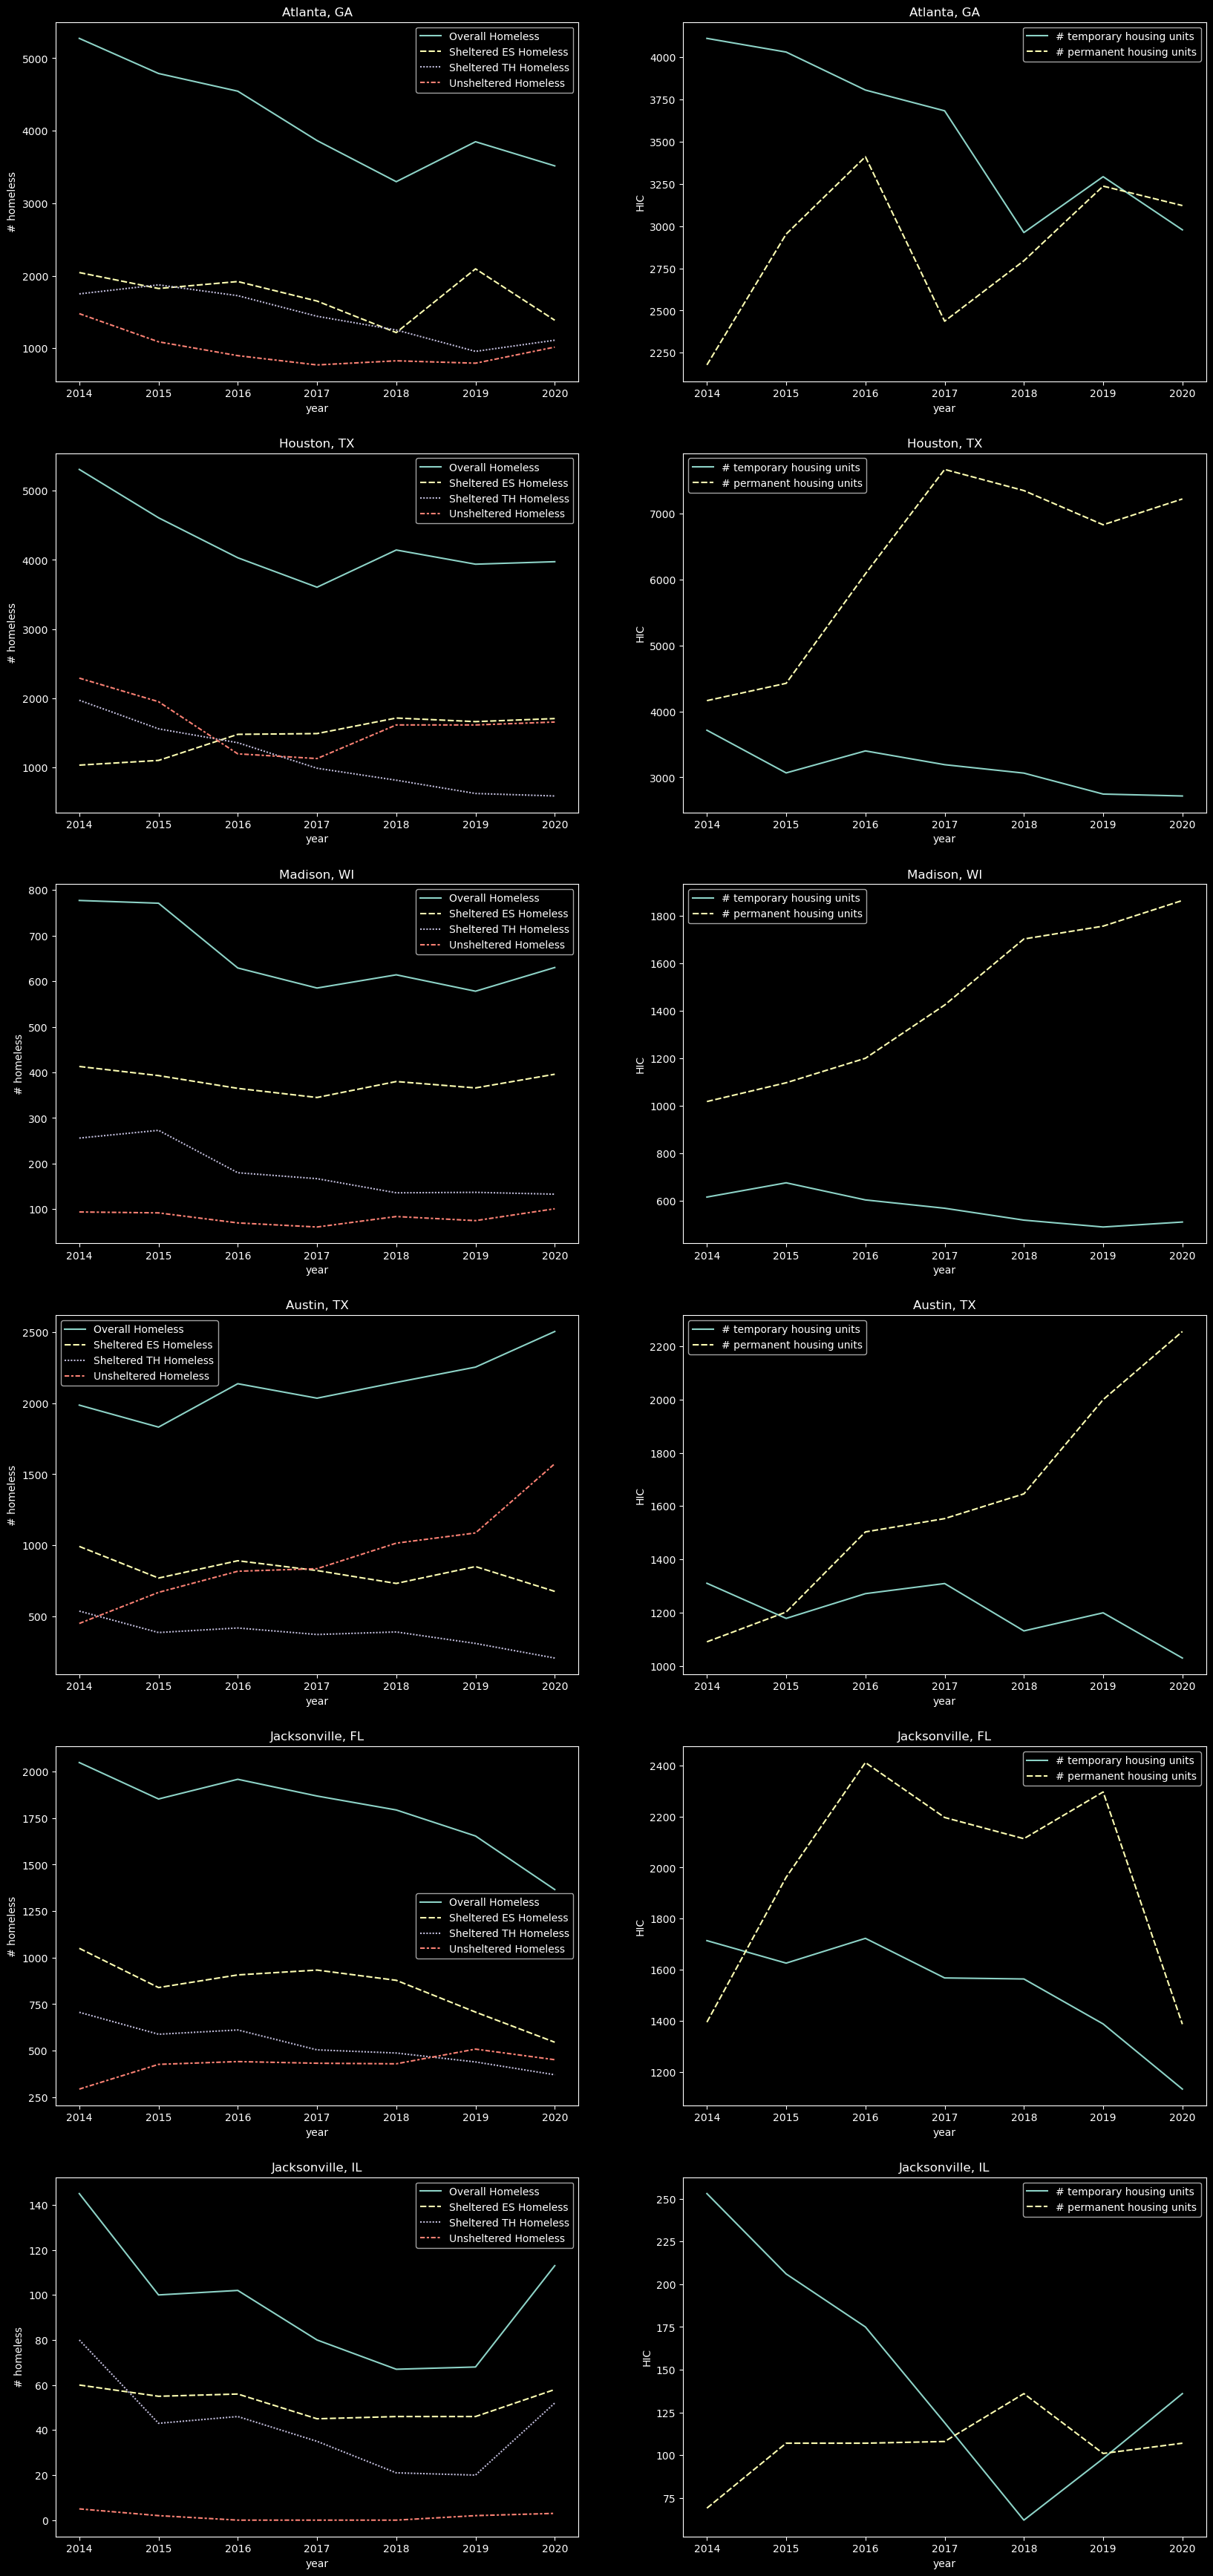

In [58]:
#change in homeless numbers between 2014 and 2020

cities = [('atlanta', 'ga'), ('houston', 'tx'), ('madison', 'wi'), ('austin', 'tx'), ('jacksonville', 'fl'), ('jacksonville', 'il')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,44));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]
    sns.lineplot(ax = axes[i][0], data = city_data.groupby('year').sum())
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    
    sns.lineplot(ax = axes[i][1], data = city_HIC_data.groupby('year').sum());
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC')
plt.show()    

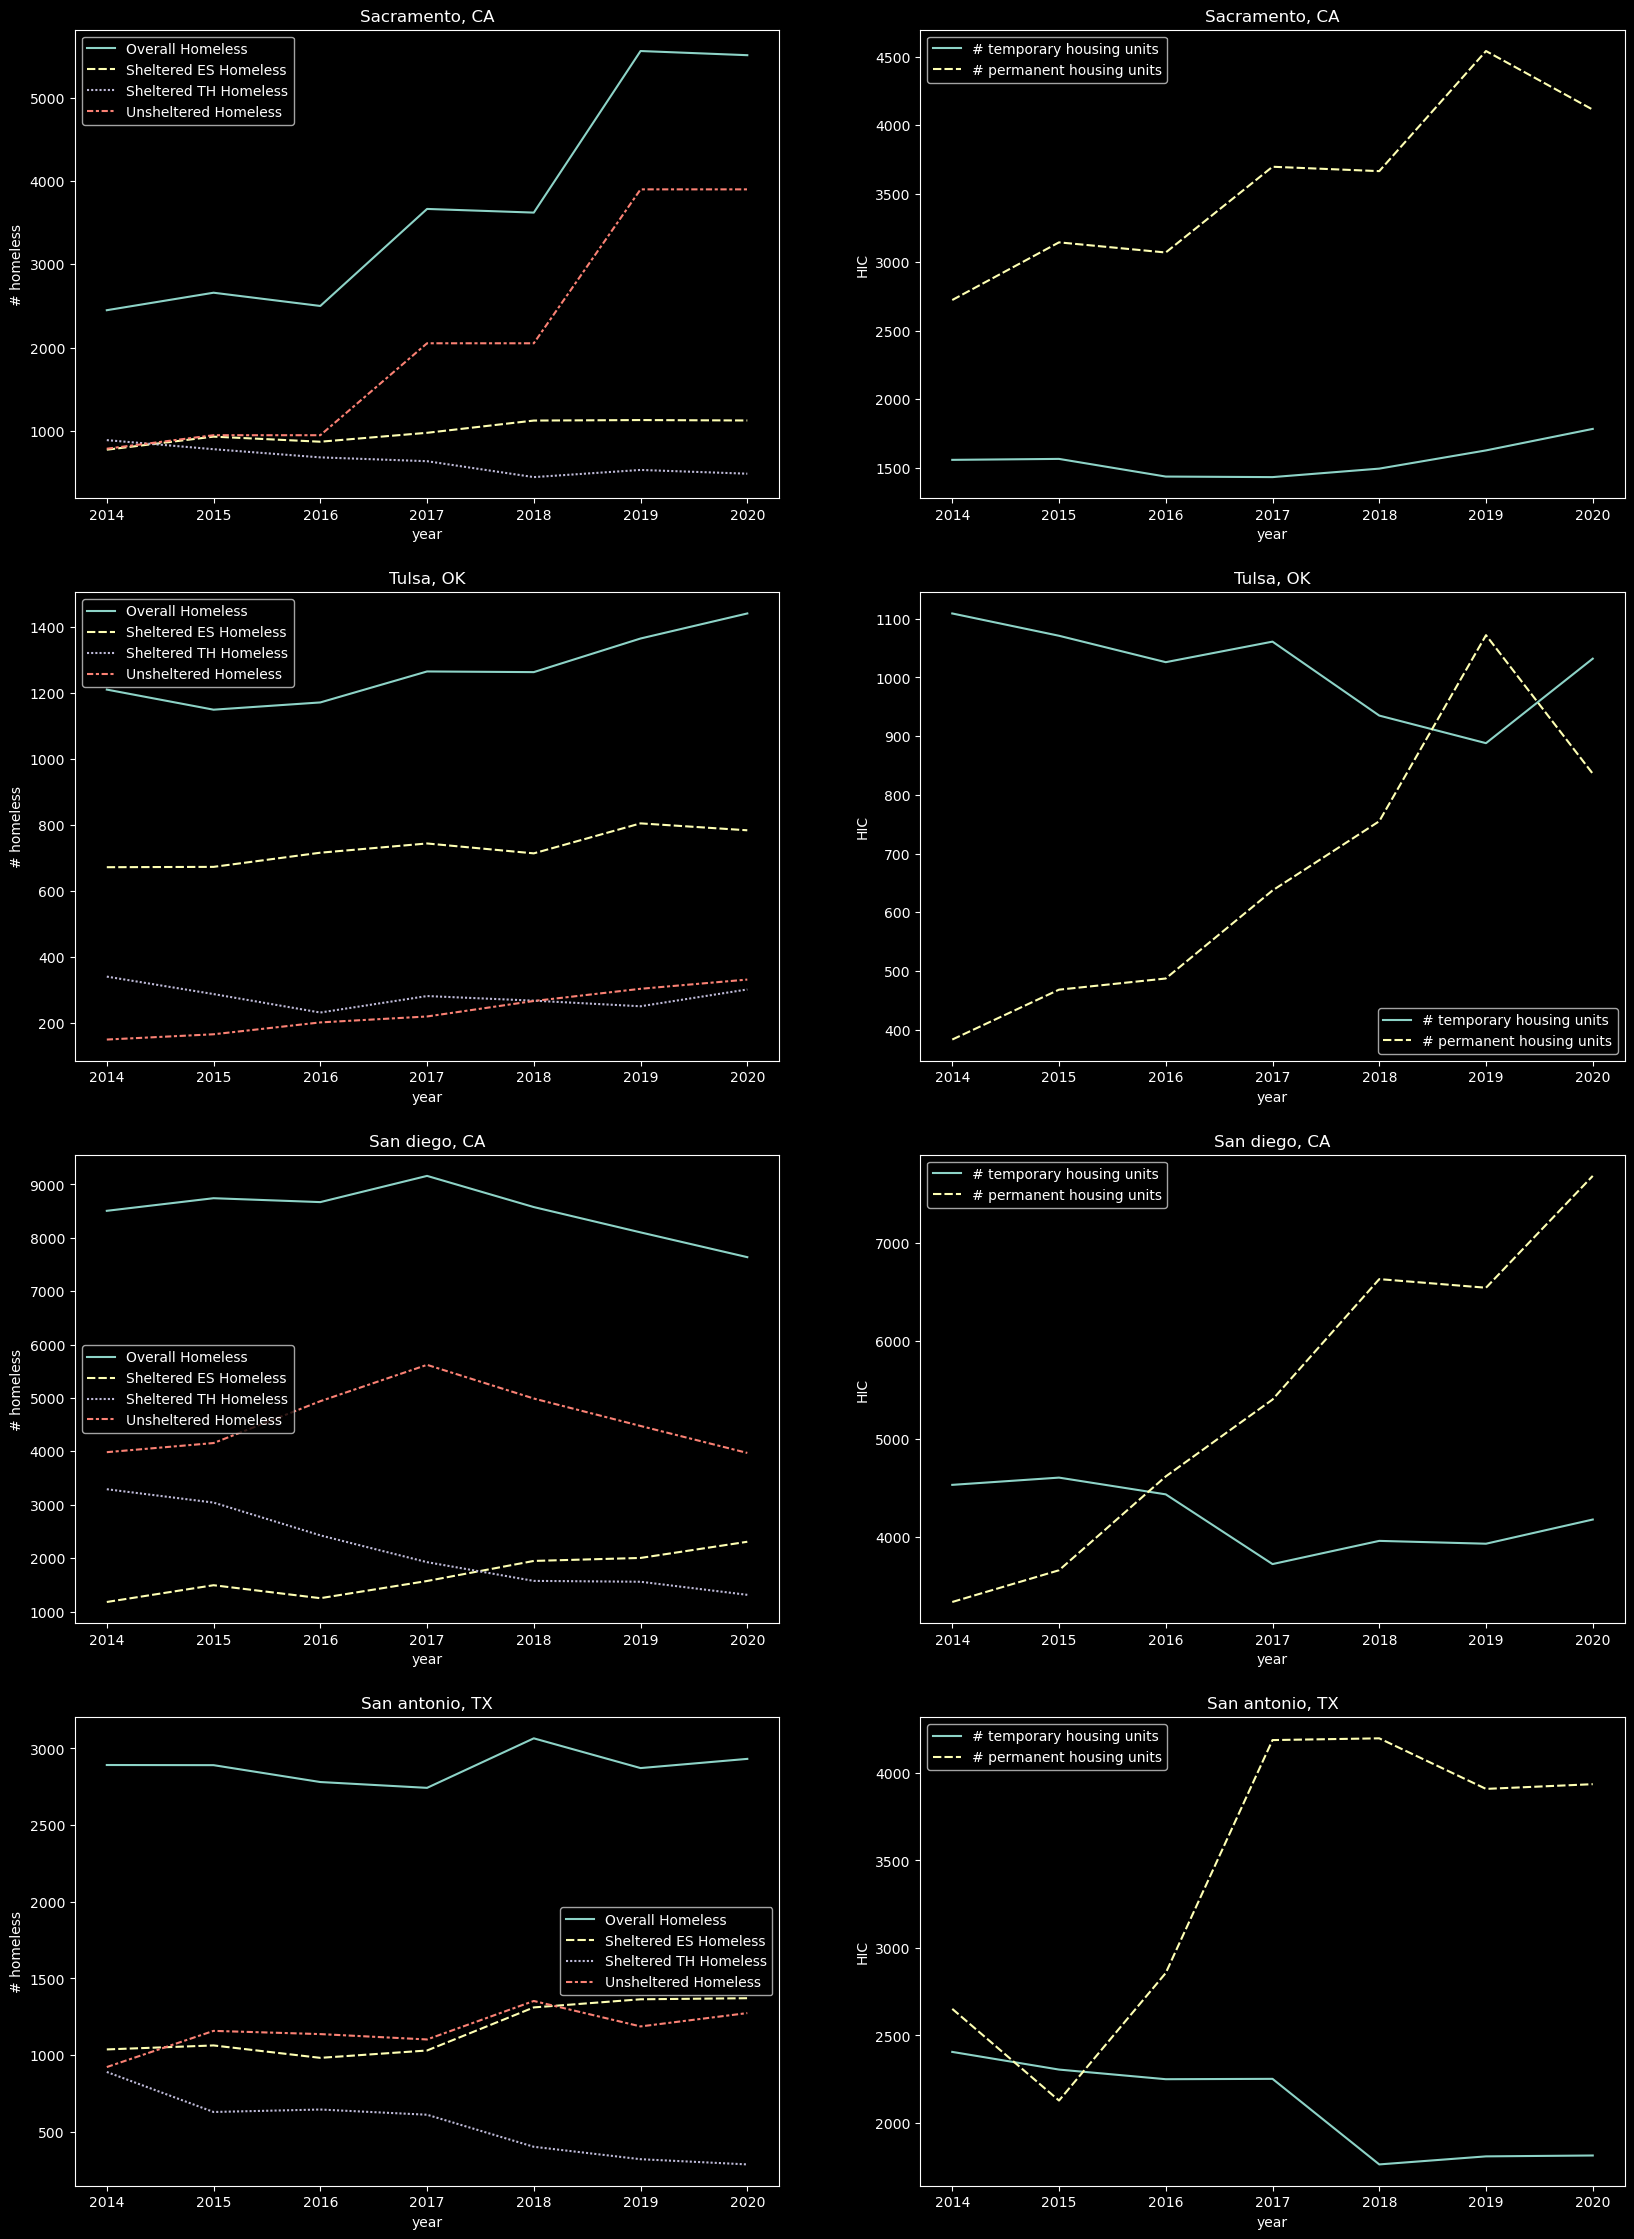

In [59]:
cities = [('sacramento', 'ca'), ('tulsa', 'ok'), ('san diego', 'ca'), ('san antonio', 'tx')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,28));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    

    sns.lineplot(data=city_data.groupby('year').sum(),ax = axes[i][0])
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')
   
    sns.lineplot(data=city_HIC_data.groupby('year').sum(),ax = axes[i][1])
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC');

    
plt.show()

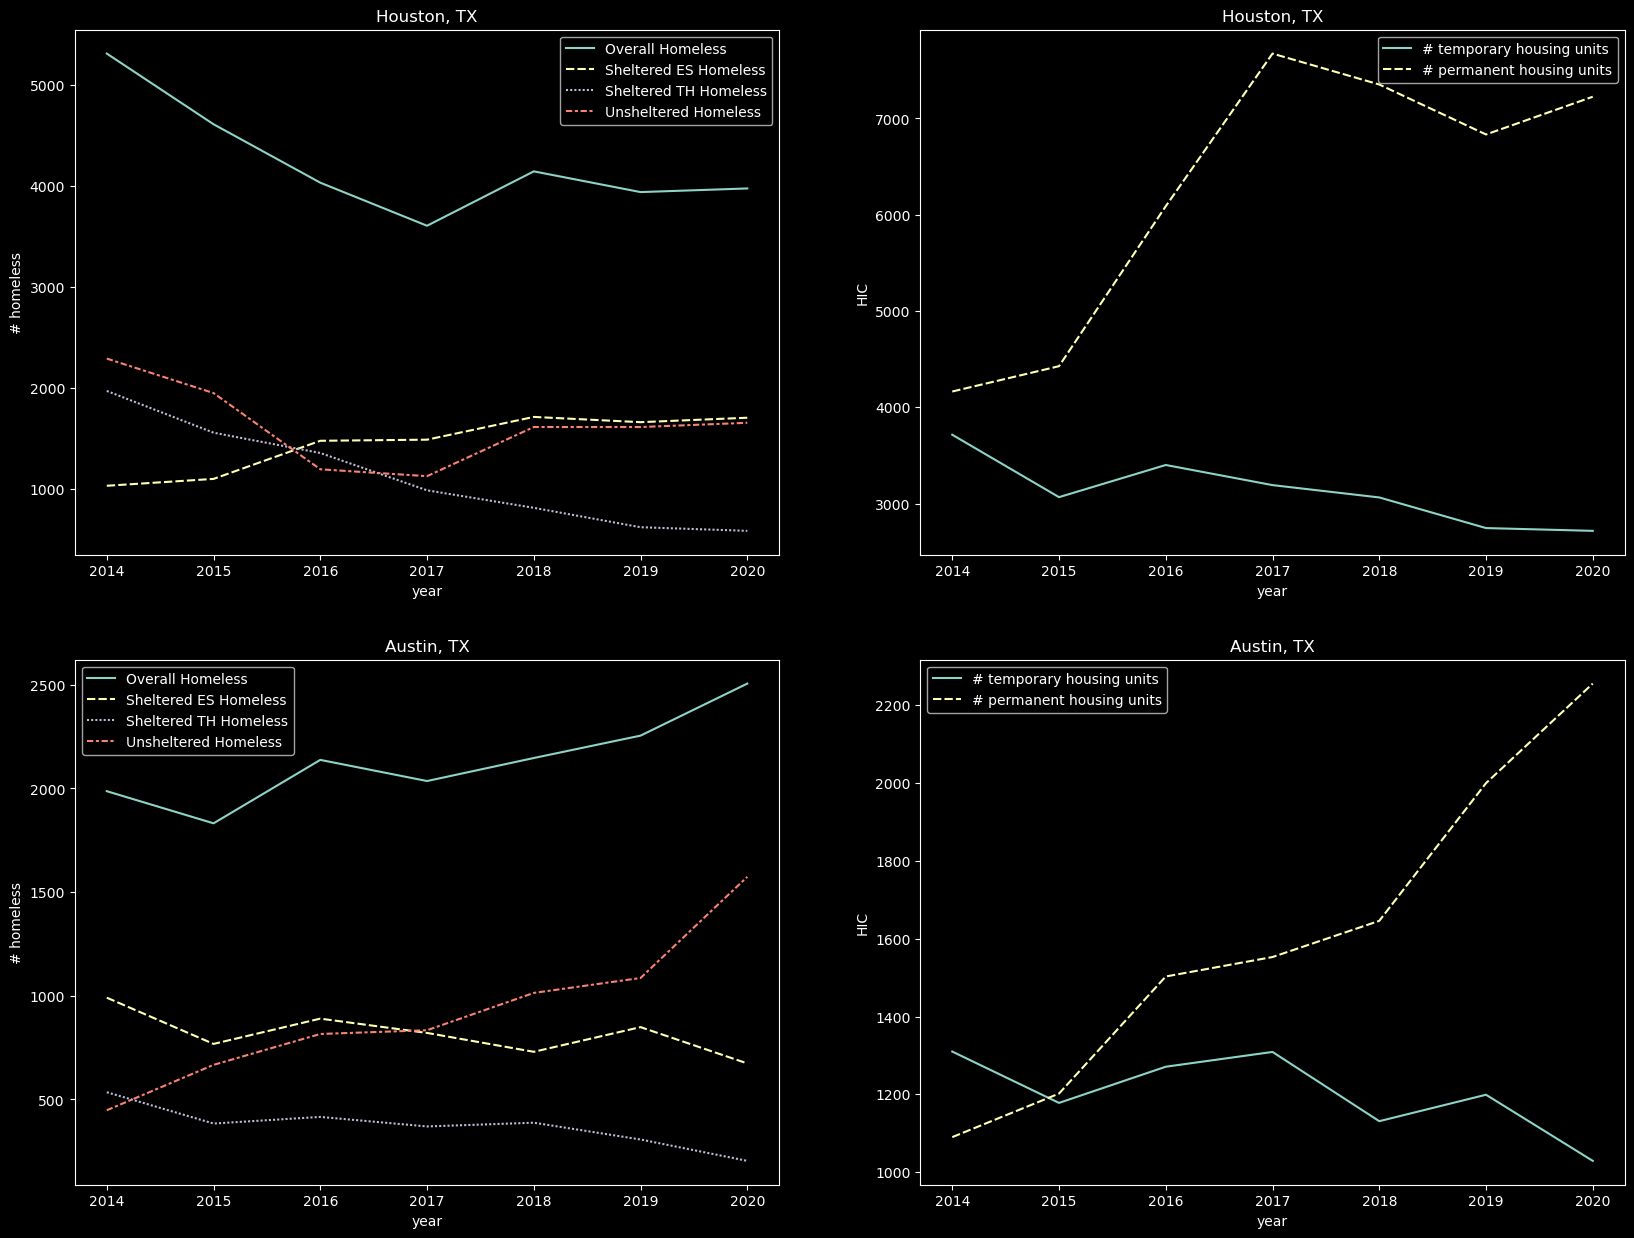

In [140]:
cities = [('houston', 'tx'), ('austin', 'tx')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,15));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    

    sns.lineplot(data=city_data.groupby('year').sum(),ax = axes[i][0])
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')
   
    sns.lineplot(data=city_HIC_data.groupby('year').sum(),ax = axes[i][1])
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC');

    
plt.show()

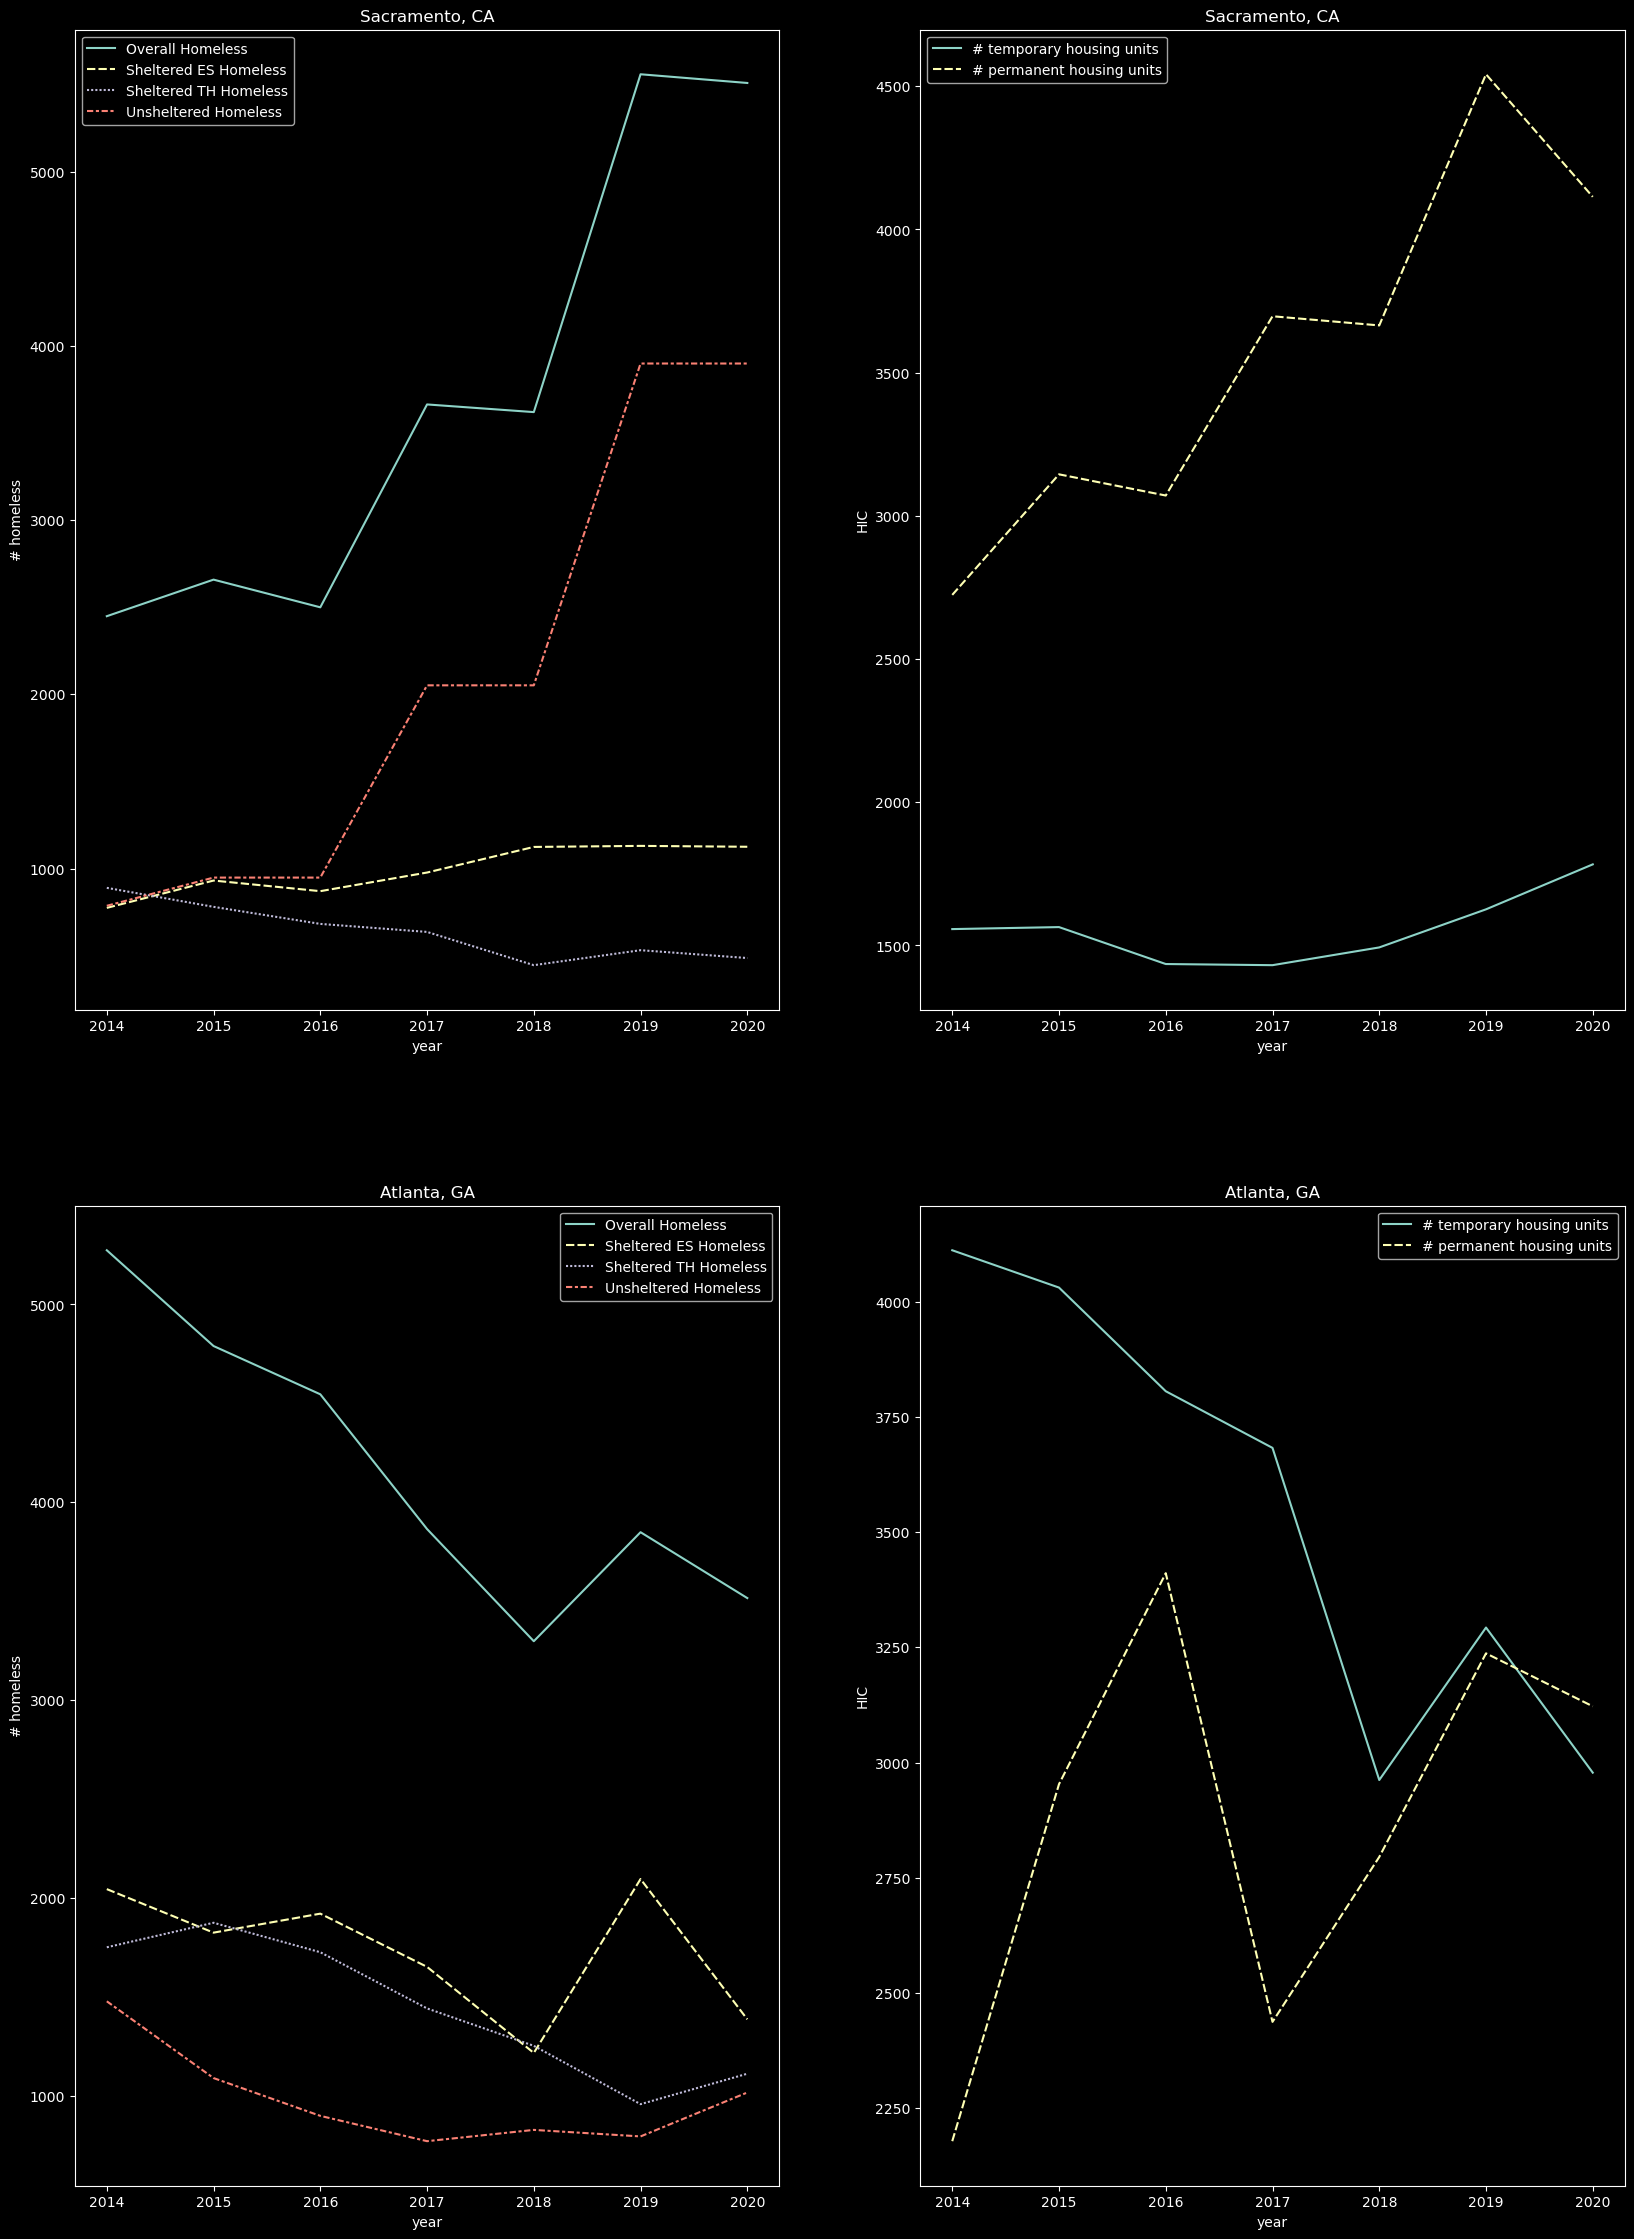

In [61]:
cities = [('sacramento', 'ca'), ('atlanta', 'ga')];
fig, axes = plt.subplots(len(cities),2,figsize = (20,28));

for i, (city, state) in enumerate(cities):
    city_data = data[(data['City'] == city)&(data['State'] == state)][['Overall Homeless', 'year', 'Sheltered ES Homeless', 'Sheltered TH Homeless','Unsheltered Homeless']]

    df = data_2[(data_2['City'] == city)&(data_2['State'] == state)][['year', 'Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']]
    city_HIC_data = df[['year']].copy()
    city_HIC_data['# temporary housing units'] = df['Total Year-Round Beds (ES, TH, SH)'].copy()
    city_HIC_data['# permanent housing units'] = df[['Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis=1).copy()    

    sns.lineplot(data=city_data.groupby('year').sum(),ax = axes[i][0])
    axes[i][0].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][0].set_ylabel('# homeless')
   
    sns.lineplot(data=city_HIC_data.groupby('year').sum(),ax = axes[i][1])
    axes[i][1].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i][1].set_ylabel('HIC');

    
plt.show()

### Normalizing homeless counts by population of cities

In [14]:
#Creating a dictionary of state names and their abbreviations

state_abbr = pd.read_csv('../state_abbr.csv', index_col=0)
state_abbr = state_abbr.set_index('State_name')
state_abbr_dict = state_abbr.to_dict(orient='dict')['State_abbr']

In [15]:
population = pd.read_excel('../Population.xlsx', header = 1)
population.head()
population = population.drop(columns = ['Rank'])

#renaming population columns
# population = population.rename(columns = {i:f'population_{i}' for i in range(2010,2020)})

#Add State column

population['State'] = population['Geographic Area'].map(lambda x: (state_abbr_dict[x.split(',')[1].strip()]).lower())


#adding a city column
population['City'] = population['Geographic Area'].map(lambda x: x.split(' city')[0].lower())

population = population.drop(columns = ['Geographic Area'])

population = population.melt(id_vars=["City", "State"], 
        var_name="year", 
        value_name="Population")

population.head()


,City,State,year,Population
0,new york,ny,2010,8190209
1,los angeles,ca,2010,3795512
2,chicago,il,2010,2697477
3,houston,tx,2010,2100280
4,phoenix,az,2010,1449038


In [30]:
# merging PIT data with population data

PIT_city = data.groupby(['City', 'State', 'year'])[['Overall Homeless']].sum().reset_index()


PIT_city_pop = PIT_city.merge(population, how = 'inner', on = ['City', 'State', 'year'])

#191 cities with population info
PIT_city_pop.groupby(['City', 'State']).count()

PIT_city_pop['homeless_percentage'] = (PIT_city_pop['Overall Homeless']*100/PIT_city_pop['Population']).round(2)
PIT_city_pop


,City,State,year,Overall Homeless,Population,homeless_percentage
0,akron,oh,2014,870.0,199008,0.44
1,akron,oh,2015,760.0,198588,0.38
2,akron,oh,2016,679.0,198068,0.34
3,akron,oh,2017,507.0,198085,0.26
4,akron,oh,2018,587.0,197884,0.30
...,...,...,...,...,...,...
1141,youngstown,oh,2015,368.0,64687,0.57
1142,youngstown,oh,2016,346.0,64335,0.54
1143,youngstown,oh,2017,262.0,64540,0.41
1144,youngstown,oh,2018,180.0,64860,0.28


In [76]:
# Merging HIC data with the above

HIC_city = data_2.groupby(['City', 'State','year'])[['Total Year-Round Beds (ES, TH, SH)','Total Year-Round Beds (RRH)','Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum().reset_index()
HIC_PIT_pop = HIC_city.merge(PIT_city_pop, how = 'inner', on = ['City', 'State', 'year'])


HIC_PIT_pop['temporary_housing_per_homeless'] = (HIC_PIT_pop['Total Year-Round Beds (ES, TH, SH)']*100/HIC_PIT_pop['Population']).round(2)
HIC_PIT_pop['permanent_housing'] = HIC_PIT_pop[['Total Year-Round Beds (RRH)', 'Total Year-Round Beds (PSH)', 'Total Year-Round Beds (OPH)']].sum(axis = 1)
HIC_PIT_pop['permanent_housing_per_homeless'] = (HIC_PIT_pop['permanent_housing']*100/HIC_PIT_pop['Population']).round(2)
HIC_PIT_pop

,City,State,year,"Total Year-Round Beds (ES, TH, SH)",Total Year-Round Beds (RRH),Total Year-Round Beds (PSH),Total Year-Round Beds (OPH),Overall Homeless,Population,homeless_percentage,temporary_housing_per_homeless,permanent_housing,permanent_housing_per_homeless
0,akron,oh,2014,665.0,203.0,463.0,0.0,870.0,199008,0.44,0.33,666.0,0.33
1,akron,oh,2015,614.0,162.0,481.0,0.0,760.0,198588,0.38,0.31,643.0,0.32
2,akron,oh,2016,599.0,190.0,456.0,0.0,679.0,198068,0.34,0.30,646.0,0.33
3,akron,oh,2017,477.0,207.0,602.0,0.0,507.0,198085,0.26,0.24,809.0,0.41
4,akron,oh,2018,517.0,206.0,617.0,0.0,587.0,197884,0.30,0.26,823.0,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,youngstown,oh,2015,288.0,71.0,340.0,0.0,368.0,64687,0.57,0.45,411.0,0.64
1141,youngstown,oh,2016,293.0,71.0,392.0,0.0,346.0,64335,0.54,0.46,463.0,0.72
1142,youngstown,oh,2017,272.0,40.0,379.0,10.0,262.0,64540,0.41,0.42,429.0,0.66
1143,youngstown,oh,2018,193.0,13.0,557.0,0.0,180.0,64860,0.28,0.30,570.0,0.88


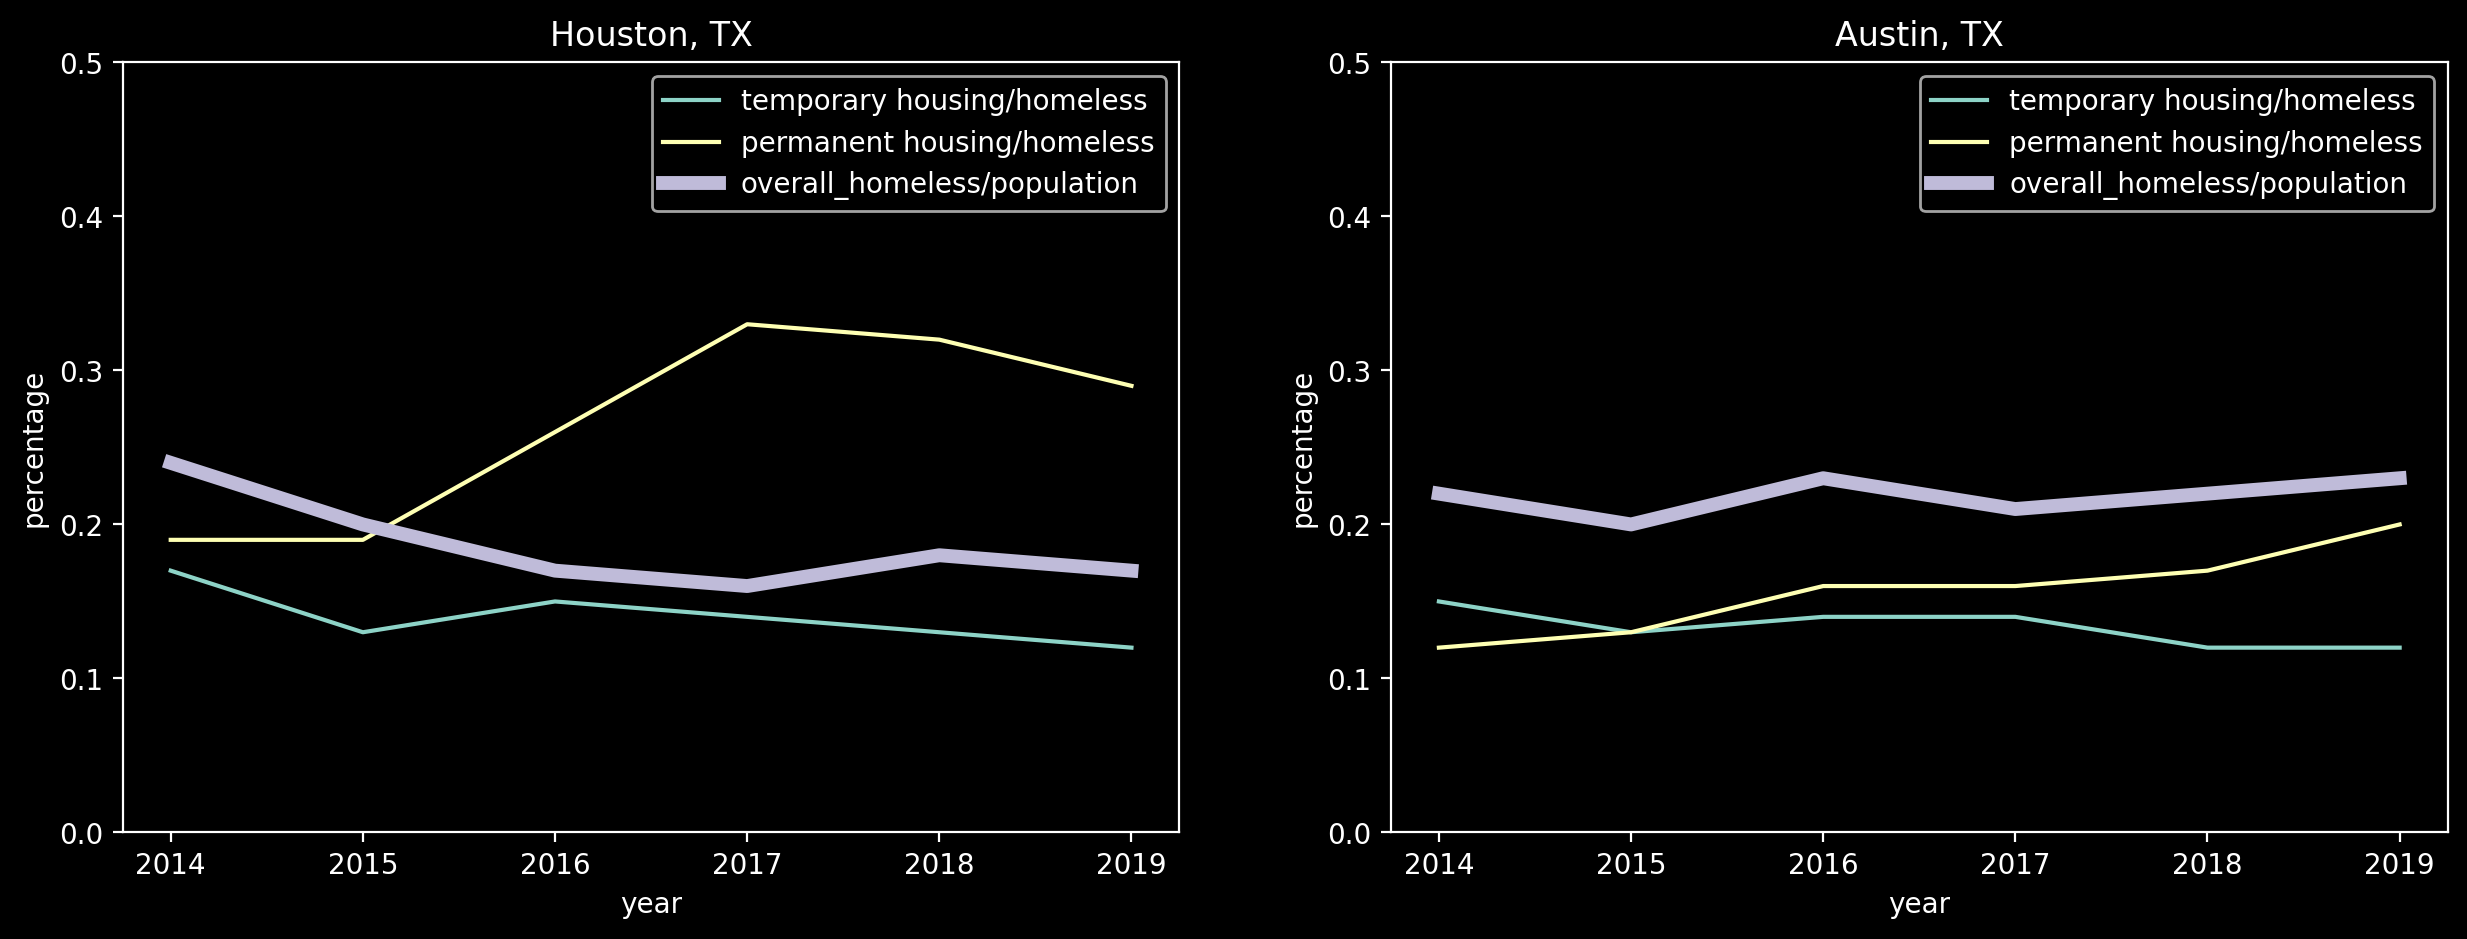

In [96]:
#plotting change in homeless and change in housing units over the years
cities = [('houston', 'tx'), ('austin', 'tx')];
fig, axes = plt.subplots(1, len(cities),figsize = (15,5), dpi = 200);

for i, (city, state) in enumerate(cities):
    
    df = HIC_PIT_pop[(HIC_PIT_pop['City'] == city)&(HIC_PIT_pop['State'] == state)][['year','homeless_percentage','temporary_housing_per_homeless', 'permanent_housing_per_homeless']]
    sns.lineplot(data = df, y = 'temporary_housing_per_homeless', x = 'year', ax = axes[i], label = 'temporary housing/homeless')
    sns.lineplot(data = df, y = 'permanent_housing_per_homeless', x = 'year', ax = axes[i], label = 'permanent housing/homeless')
    sns.lineplot(data = df, y = 'homeless_percentage', x = 'year', ax = axes[i], label = 'overall_homeless/population', linewidth = 5)
    
    axes[i].set_ylabel('percentage')
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylim([0, 0.5])
    
plt.show()


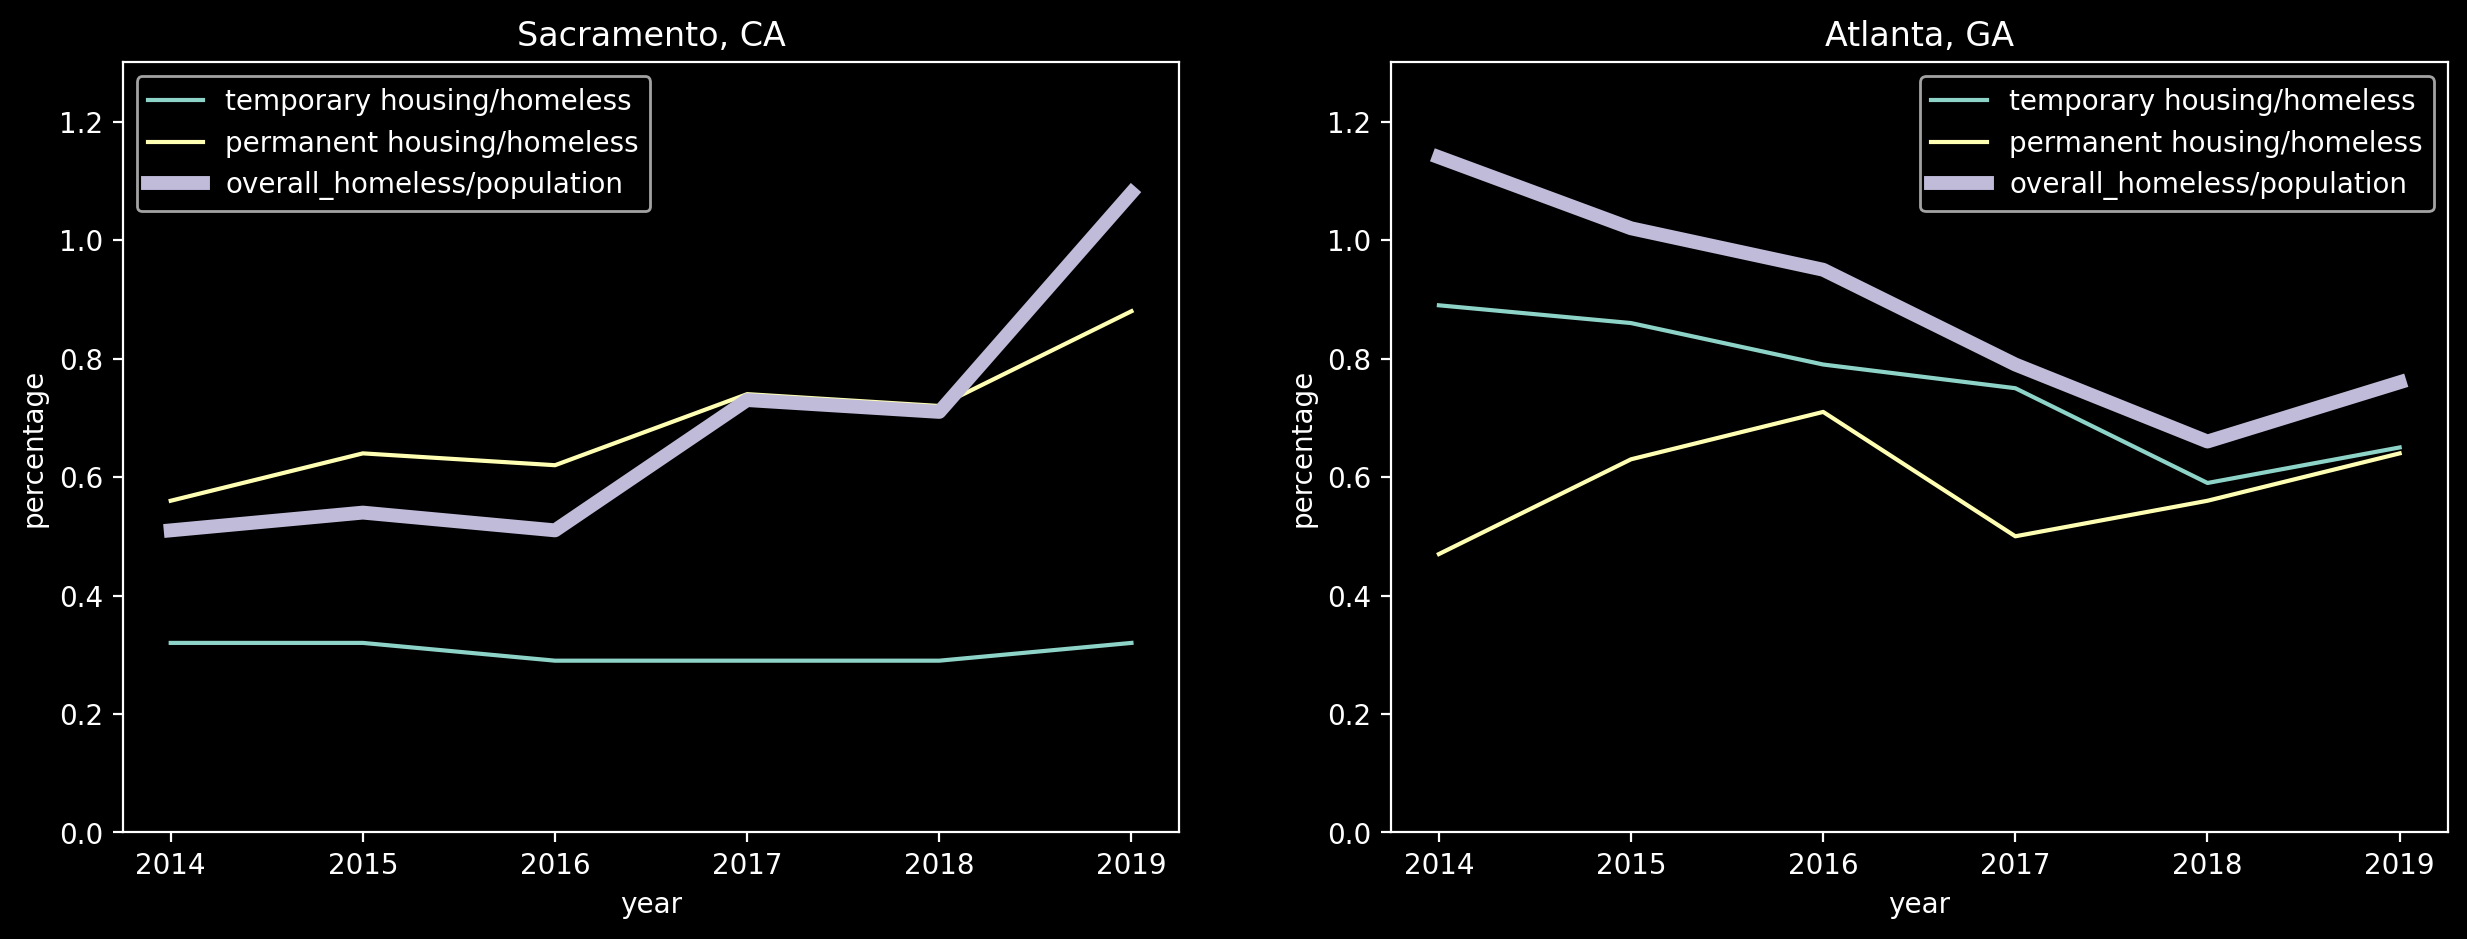

In [97]:
#plotting change in homeless and change in housing units over the years
cities = [('sacramento', 'ca'), ('atlanta', 'ga')];
fig, axes = plt.subplots(1, len(cities),figsize = (15,5), dpi = 200);

for i, (city, state) in enumerate(cities):
    
    df = HIC_PIT_pop[(HIC_PIT_pop['City'] == city)&(HIC_PIT_pop['State'] == state)][['year','homeless_percentage','temporary_housing_per_homeless', 'permanent_housing_per_homeless']]
    sns.lineplot(data = df, y = 'temporary_housing_per_homeless', x = 'year', ax = axes[i], label = 'temporary housing/homeless')
    sns.lineplot(data = df, y = 'permanent_housing_per_homeless', x = 'year', ax = axes[i], label = 'permanent housing/homeless')
    sns.lineplot(data = df, y = 'homeless_percentage', x = 'year', ax = axes[i], label = 'overall_homeless/population', linewidth = 5)
    
    axes[i].set_ylabel('percentage')
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylim([0, 1.3])
    
plt.show()


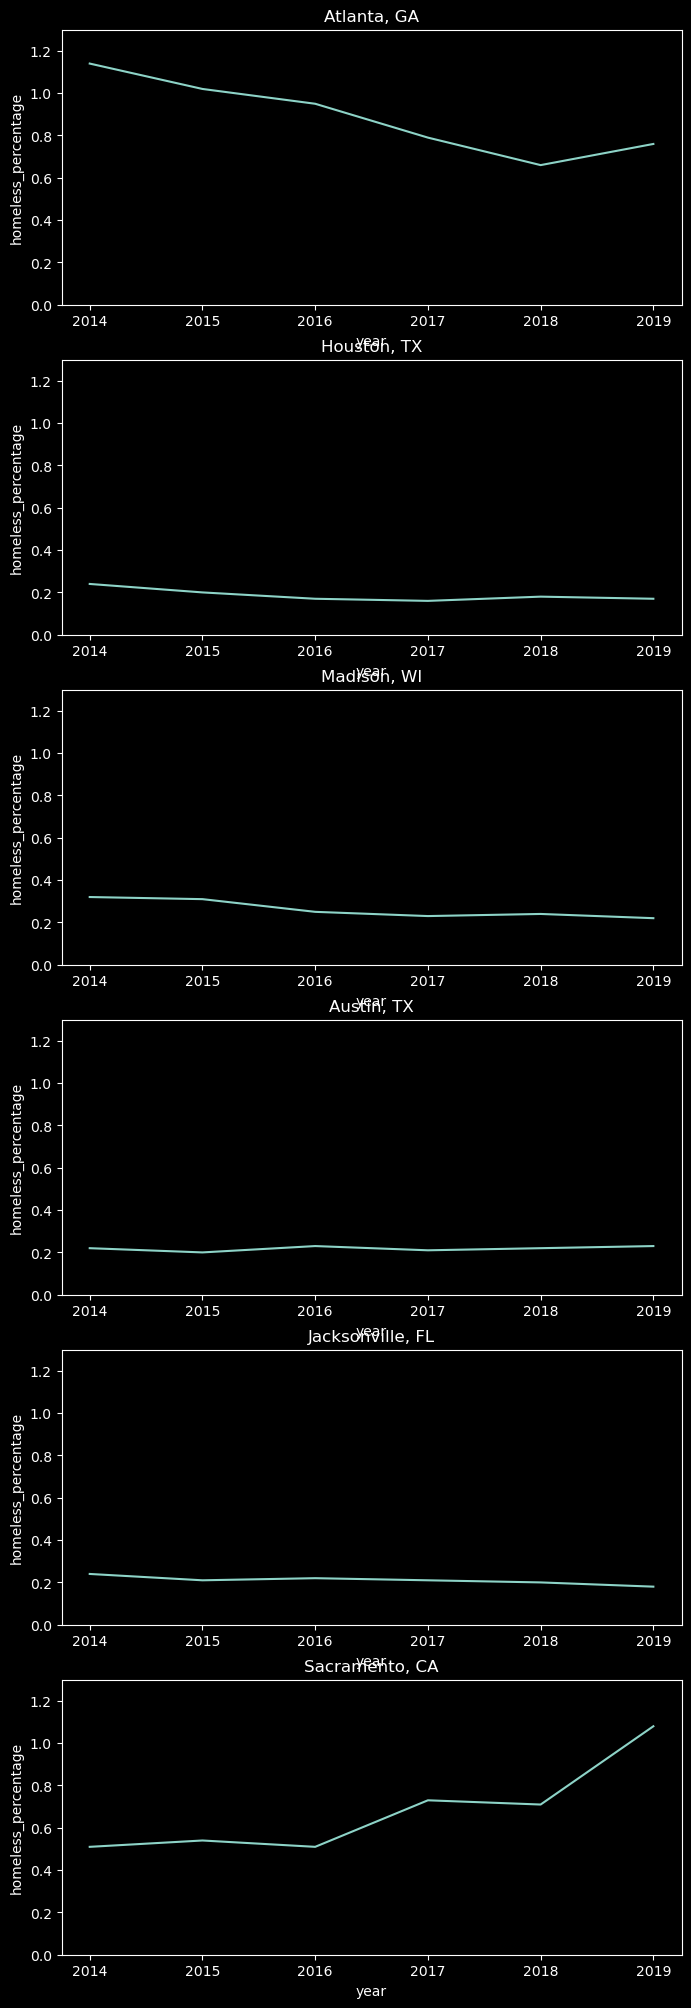

In [37]:
#change in homeless numbers/population between 2014 and 2019

cities = [('atlanta', 'ga'), ('houston', 'tx'), ('madison', 'wi'), ('austin', 'tx'), ('jacksonville', 'fl'), ('sacramento', 'ca')];
fig, axes = plt.subplots(len(cities),1,figsize = (8,25));


for i, (city, state) in enumerate(cities):
    
    df = PIT_city_pop[(PIT_city_pop['City'] == city)&(PIT_city_pop['State'] == state)]
    sns.lineplot(data = df, y = 'homeless_percentage', x = 'year', ax = axes[i])
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylim([0, 1.3])
    
plt.show()

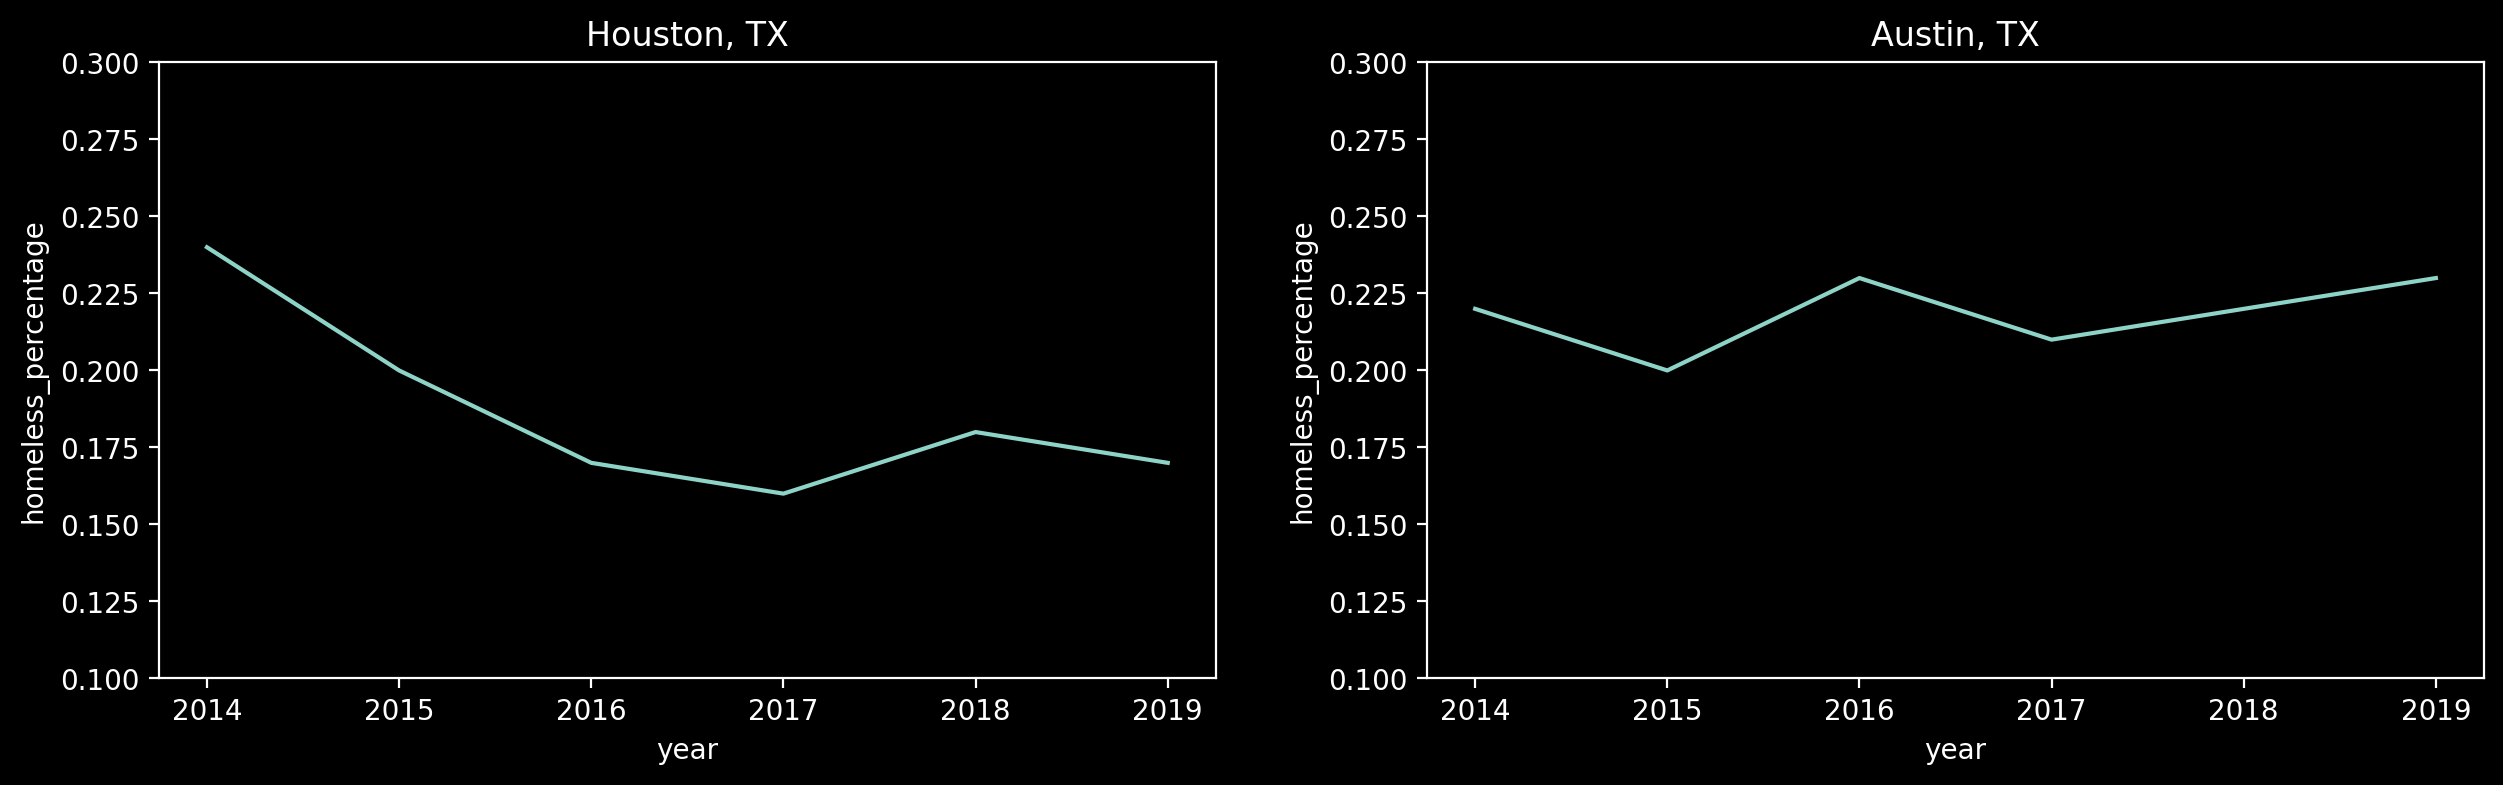

In [33]:
#change in homeless numbers/population between 2014 and 2019

cities = [ ('houston', 'tx'), ('austin', 'tx')];
fig, axes = plt.subplots(1, len(cities), figsize = (15,4), dpi = 200);

for i, (city, state) in enumerate(cities):
    
    df = PIT_city_pop[(PIT_city_pop['City'] == city)&(PIT_city_pop['State'] == state)]
    sns.lineplot(data = df, y = 'homeless_percentage', x = 'year', ax = axes[i])
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylim([0.1, 0.3])
    
plt.show()

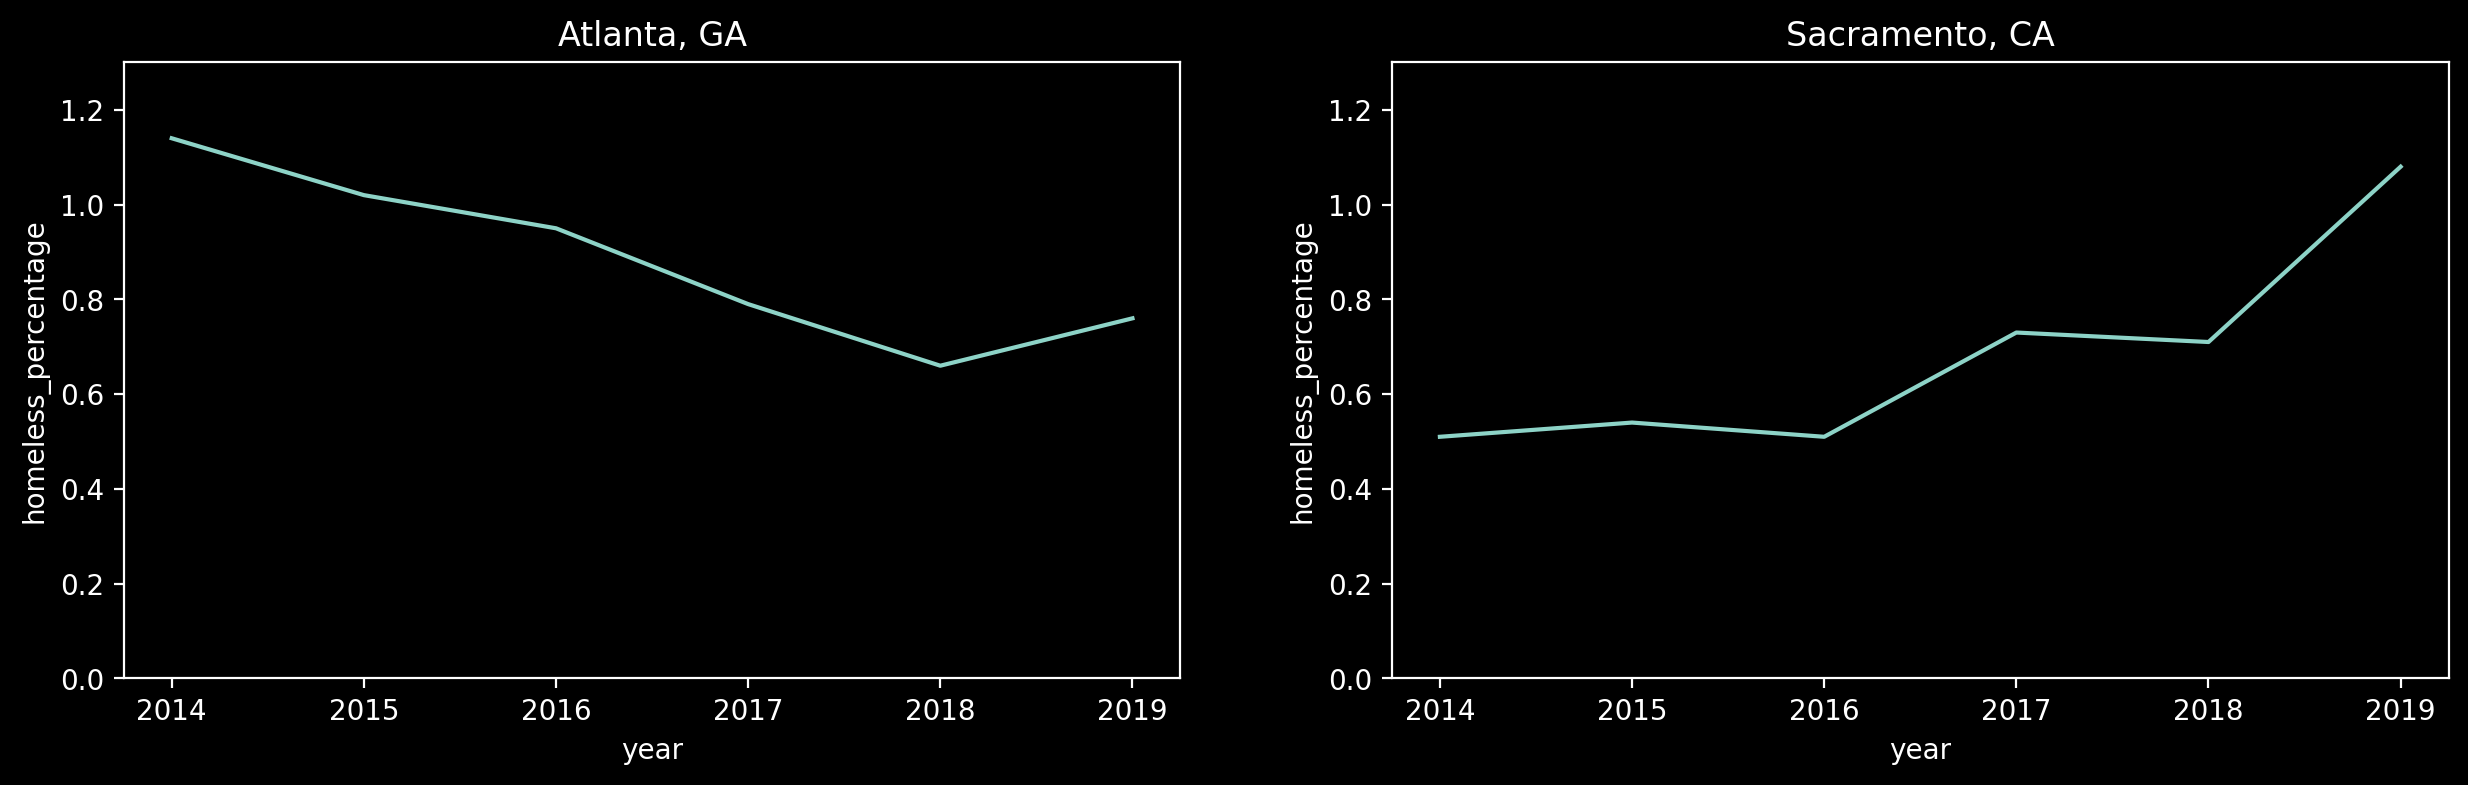

In [40]:
#change in homeless numbers/population between 2014 and 2019

cities = [ ('atlanta', 'ga'), ('sacramento', 'ca')];
fig, axes = plt.subplots(1, len(cities), figsize = (15,4), dpi = 200);

for i, (city, state) in enumerate(cities):
    
    df = PIT_city_pop[(PIT_city_pop['City'] == city)&(PIT_city_pop['State'] == state)]
    sns.lineplot(data = df, y = 'homeless_percentage', x = 'year', ax = axes[i])
    axes[i].set_title(f'{city.capitalize()}, {state.upper()}');
    axes[i].set_ylim([0, 1.3])
    
plt.show()